<a href="https://colab.research.google.com/github/bkkaggle/pytorch-CycleGAN-and-pix2pix/blob/master/CycleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Requirements

In [1]:
!pip install -r requirements.txt

# Downloading Datasets

Available datasets:

-   `[apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Custom Dataset:

-   Create a dataset folder under `/datasets` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder.

In [ ]:
!bash ./datasets/download_cyclegan_dataset.sh horse2zebra

# Training

Change the `--dataroot` and `--name` to the dataset's path and model's name.

Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/sat2map/latest_net_G_A.pth ./checkpoints/sat2map/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/sat2map/latest_net_G_B.pth ./checkpoints/sat2map/latest_net_G.pth` if you want to transform images from class B to class A.


In [0]:
!python train.py --dataroot ./datasets/maps --name sat2map --model cycle_gan

In [2]:
import matplotlib.pyplot as plt

In [3]:
%config InlineBackend.figure_format = 'retina'

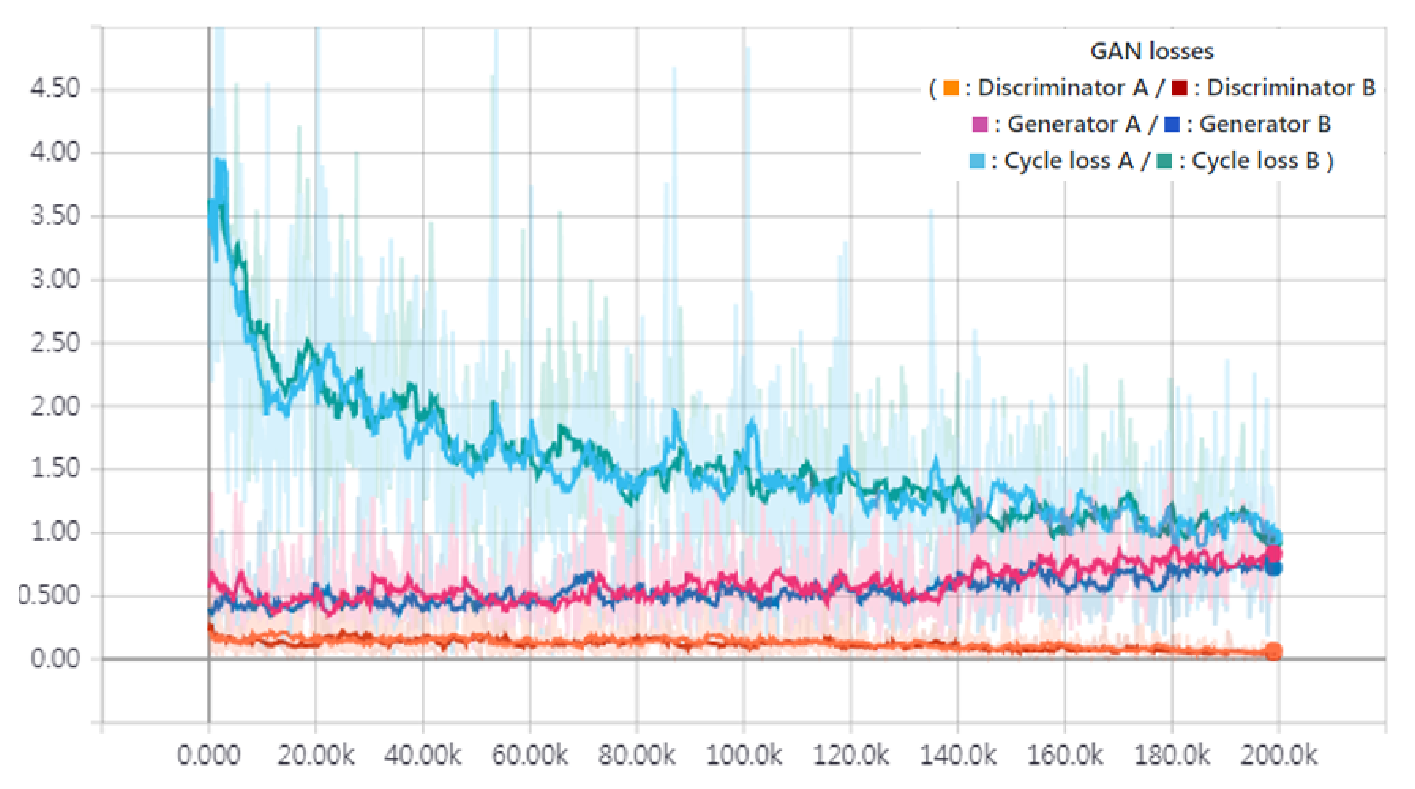

In [4]:
img = plt.imread('CycleGAN_losses_with_legends_epochs_200.jpg')
fig, ax = plt.subplots(figsize=(15, 7))
ax.imshow(img)
ax.axis('off')
plt.show()

# Testing

Change the `--dataroot` and `--name` to be consistent with the trained model's configuration.

The option `--model` test is used for generating results of CycleGAN only for one side.

The results will be saved at `./results/`. Use `--results_dir {directory_path_to_save_result}` to specify the results directory.

In [5]:
!python test.py --dataroot datasets/maps/testA --name sat2map_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/maps/testA           	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

# Visualizing Results

In [6]:
import matplotlib.pyplot as plt

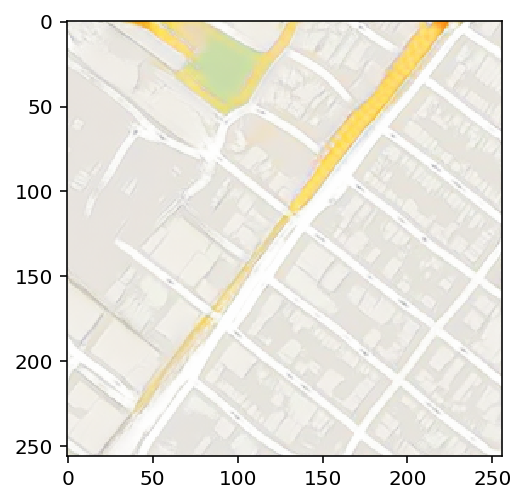

In [7]:
img = plt.imread('./results/sat2map_pretrained/test_latest/images/1000_A_fake.png')
plt.imshow(img)

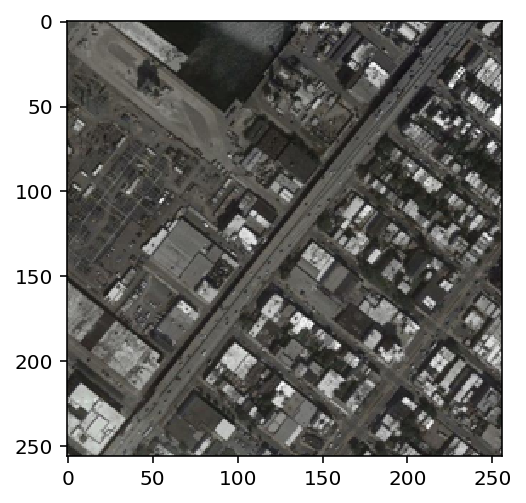

In [8]:
img = plt.imread('./results/sat2map_pretrained/test_latest/images/1000_A_real.png')
plt.imshow(img)

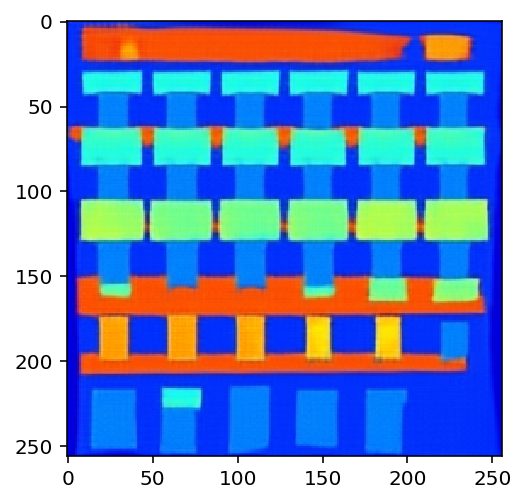

In [9]:
img = plt.imread('./results/facades_photo2label_pretrained/test_latest/images/10_fake.png')
plt.imshow(img)

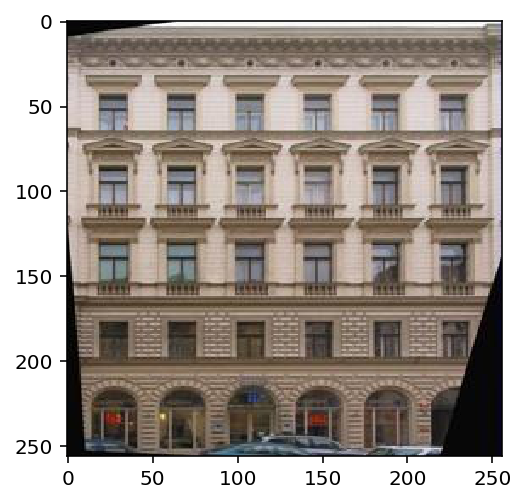

In [10]:
img = plt.imread('./results/facades_photo2label_pretrained/test_latest/images/10_real.png')
plt.imshow(img)

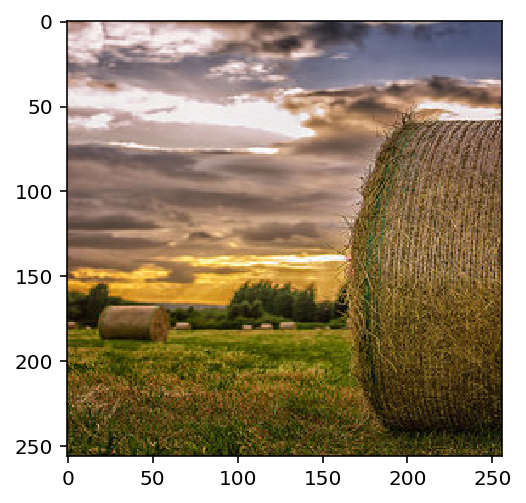

In [11]:
img = plt.imread('./results/style_cezanne_pretrained/test_latest/images/2014-08-03 17_39_45_real.png')
plt.imshow(img)

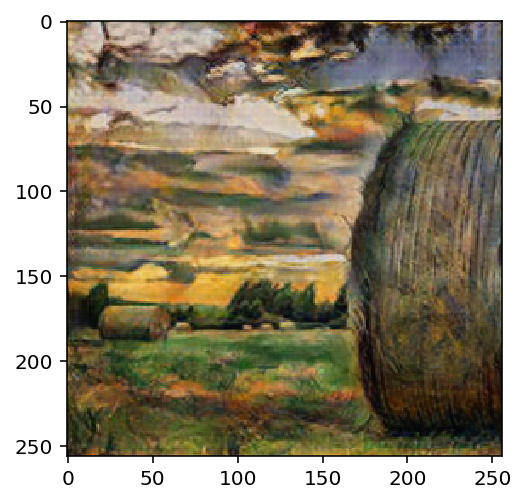

In [12]:
img = plt.imread('./results/style_cezanne_pretrained/test_latest/images/2014-08-03 17_39_45_fake.png')
plt.imshow(img)

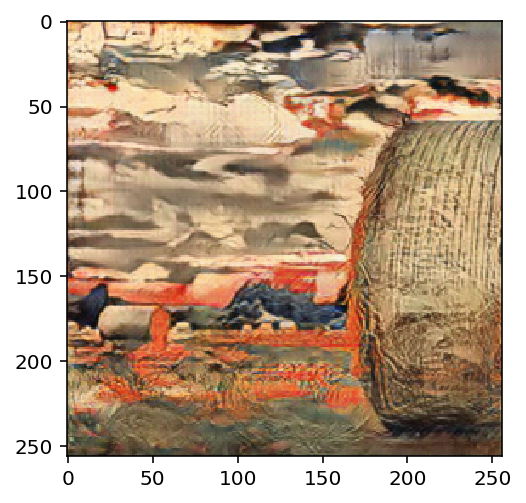

In [13]:
img = plt.imread('./results/style_ukiyoe_pretrained/test_latest/images/2014-08-03 17_39_45_fake.png')
plt.imshow(img)

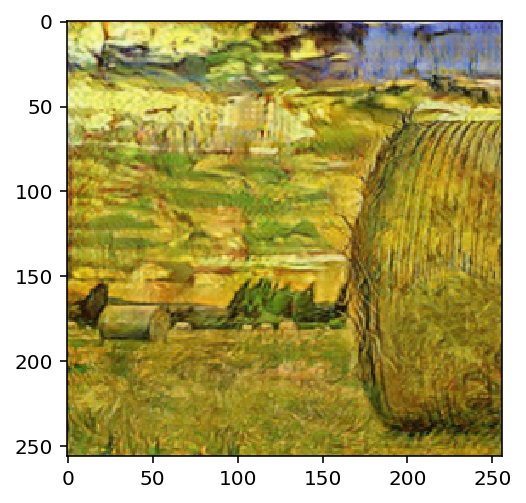

In [14]:
img = plt.imread('./results/style_vangogh_pretrained/test_latest/images/2014-08-03 17_39_45_fake.png')
plt.imshow(img)

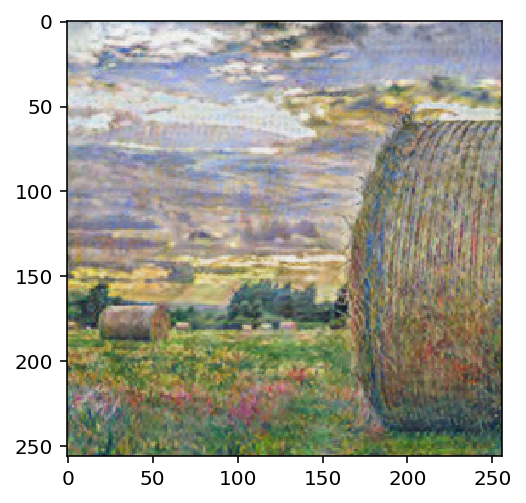

In [15]:
img = plt.imread('./results/style_monet_pretrained/test_latest/images/2014-08-03 173945_fake.png')
plt.imshow(img)